In [9]:
import qiskit
from qiskit import quantum_info
from qiskit.execute_function import execute
from qiskit import BasicAer
import numpy as np
import pickle
import json
import os
from collections import Counter
from sklearn.metrics import mean_squared_error
from typing import Dict, List
import matplotlib.pyplot as plt

#define utility functions

def simulate(circuit: qiskit.QuantumCircuit) -> dict:
    """Simulate the circuit, give the state vector as the result."""
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    state_vector = result.get_statevector()
    
    histogram = dict()
    for i in range(len(state_vector)):
        population = abs(state_vector[i]) ** 2
        if population > 1e-9:
            histogram[i] = population
    
    return histogram


def histogram_to_category(histogram):
    """This function take a histogram representations of circuit execution results, and process into labels as described in 
    the problem description."""
    assert abs(sum(histogram.values())-1)<1e-8
    positive=0
    for key in histogram.keys():
        digits = bin(int(key))[2:].zfill(20)
        if digits[-1]=='0':
            positive+=histogram[key]
        
    return positive


def count_gates(circuit: qiskit.QuantumCircuit) -> Dict[int, int]:
    """Returns the number of gate operations with each number of qubits."""
    counter = Counter([len(gate[1]) for gate in circuit.data])
    #feel free to comment out the following two lines. But make sure you don't have k-qubit gates in your circuit
    #for k>2
    for i in range(2,20):
        assert counter[i]==0
        
    return counter


def image_mse(image1,image2):
    # Using sklearns mean squared error:
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
    return mean_squared_error(image1, image2)

In [10]:
#load the mock data (for testing only)
files=os.listdir("mock_data")
dataset=list()
for file in files:
    with open('mock_data/'+file, "r") as infile:
        loaded = json.load(infile)
        dataset.append(loaded)

28
(28, 28)


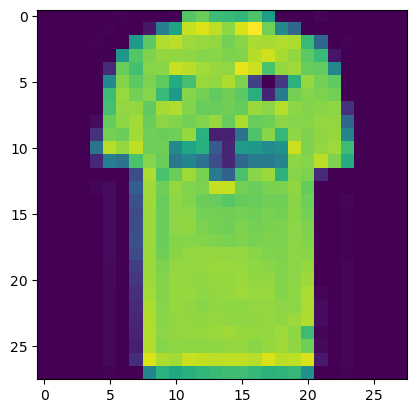

In [11]:
#load the actual hackthon data (fashion-mnist)
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')


#you can visualize it
plt.imshow(images[2])
print(len(images[2]))
# print(sum([sum([(255*pixel)**2 for pixel in row]) for row in images[1100]]))
int_image = np.array([pixel*255*255 for pixel in images[1100]])
flatint_image = int_image.flatten()
# print(len(flatint_image), flatint_image)
norm_image = flatint_image / 255

print(int_image.shape)

In [14]:
#submission to part 1, you should make this into a .py file

n=len(dataset)
mse=0
gatecount=0

def normfunc(i):
    return np.sqrt(np.sum(i**2))
    

# Functions 'encode' and 'decode' are dummy.
def encode(image):
    print(images.shape)
    for i in images:
        int_image = i
        pixeldata = np.array([pixel*255*255 for pixel in int_image])

        flatint_image = pixeldata.flatten()
        #print(np.linalg.norm(flatint_image))
        norm_image = flatint_image / np.linalg.norm(flatint_image)
        

    desired_state_vec = np.pad(norm_image, [(0, 240)], mode='constant', constant_values=0)


    circ = qiskit.QuantumCircuit(10)
    circ.initialize(desired_state_vec, [*range(10)])
    
    old_circ = None
    new_circ = circ
    
    while old_circ != new_circ:
        old_circ = new_circ
        new_circ = old_circ.decompose()
    
    return circ

def decode(histogram):
    if 1 in histogram.keys():
        image=[[0,0],[0,0]]
    else:
        image=[[1,1],[1,1]]
    return image

def run_part1(image):
    #encode image into a circuit
    circuit=encode(image)

    #simulate circuit
    histogram=simulate(circuit)

    #reconstruct the image
    #image_re=decode(histogram)

    return circuit, histogram


In [15]:
#how we grade your submission

n=len(dataset)
mse=0
gatecount=0

for data in dataset:
    #encode image into circuit
    circuit, histogram=run_part1(data['image'])
    
    #count the number of 2qubit gates used
    #gatecount+=count_gates(circuit)[2]
    
    #calculate mse
    #mse+=image_mse(data['image'],image_re)
    
#fidelity of reconstruction
#f=1-mse
#gatecount=gatecount/n

#score for part1 
#print(f*(0.999**gatecount))

(2000, 28, 28)
(2000, 28, 28)


KeyboardInterrupt: 